<a href="https://colab.research.google.com/github/vinnymurphy/covid/blob/develop/states_covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0.5, 1.0, 'Percent Death')

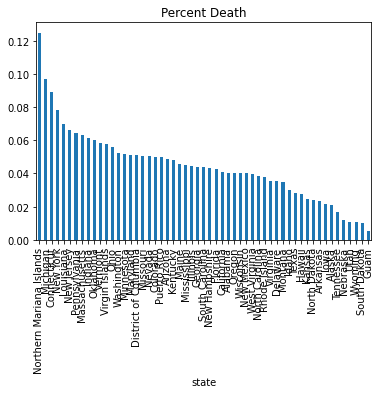

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'


states = pd.read_csv(url)
state_total = states.groupby('state').max()
state_total = state_total.drop(columns=['fips'])
state_total['percent'] = state_total['deaths'] / state_total['cases']
state_total.sort_values(by='percent', inplace=True, ascending=False)
fig = state_total['percent'].plot(kind='bar')
fig.set_title('Percent Death')


In [0]:
massachusetts = states[states['state'] == 'Massachusetts']
increase = [y - x for x,y in zip(massachusetts['cases'], massachusetts['cases'][1:])]
days = massachusetts['date'][1:]
df_mass = pd.DataFrame(data=dict(increase=increase, date=days))

ri = states[states['state'] == 'Rhode Island']
increase = [y - x for x,y in zip(ri['cases'], ri['cases'][1:])]
days = ri['date'][1:]
df_ri = pd.DataFrame(data=dict(increase=increase, date=days))


In [3]:
state_total.head(11)

,date,cases,deaths,percent
state,,,,
Northern Mariana Islands,2020-05-09,16,2,0.125000
Michigan,2020-05-09,46735,4526,0.096844
Connecticut,2020-05-09,32984,2932,0.088892
New York,2020-05-09,338519,26584,0.078530
Louisiana,2020-05-09,31417,2194,0.069835
New Jersey,2020-05-09,137085,9116,0.066499
Pennsylvania,2020-05-09,58661,3793,0.064660
Massachusetts,2020-05-09,76743,4840,0.063068
Indiana,2020-05-09,24239,1490,0.061471


In [4]:

url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
counties = pd.read_csv(url)
mass = counties[counties['state'] == 'Massachusetts']
mass = mass.drop(columns=['fips'])
mass['percent'] = mass['deaths'] / mass['cases'] 
mass.tail(15).T





,127989,127990,127991,127992,127993,127994,127995,127996,127997,127998,127999,128000,128001,128002,128003
date,2020-05-09,2020-05-09,2020-05-09,2020-05-09,2020-05-09,2020-05-09,2020-05-09,2020-05-09,2020-05-09,2020-05-09,2020-05-09,2020-05-09,2020-05-09,2020-05-09,2020-05-09
county,Barnstable,Berkshire,Bristol,Dukes,Essex,Franklin,Hampden,Hampshire,Middlesex,Nantucket,Norfolk,Plymouth,Suffolk,Unknown,Worcester
state,Massachusetts,Massachusetts,Massachusetts,Massachusetts,Massachusetts,Massachusetts,Massachusetts,Massachusetts,Massachusetts,Massachusetts,Massachusetts,Massachusetts,Massachusetts,Massachusetts,Massachusetts
cases,1056,472,4847,23,11211,294,4647,659,17307,11,6887,6311,15119,288,7611
deaths,66,37,260,1,625,42,445,50,1169,0,635,384,703,3,420
percent,0.0625,0.0783898,0.0536414,0.0434783,0.0557488,0.142857,0.0957607,0.0758725,0.0675449,0,0.0922027,0.0608461,0.0464978,0.0104167,0.0551833


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
plt.rcParams['figure.figsize'] = [15, 5]
from IPython import display
from ipywidgets import interact, widgets

def county_info(name, column):
  return mass[mass['county'] == name][column]

In [6]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Suffolk	Unknown	Worcester
fig = make_subplots(rows=3, cols=2,
                    subplot_titles=('Bristol', 'Unknown', 'Plymouth', 'Middlesex', 'Barnstable', 'Worcester')) 

fig.append_trace(go.Scatter(
    x=county_info('Bristol', 'date'),
    y=county_info('Bristol', 'cases'),
    mode='lines+markers',
    name='Bristol',

), row=1, col=1)
fig.append_trace(go.Scatter(
    x=county_info('Unknown', 'date'),
    y=county_info('Unknown', 'cases'),
    mode='lines+markers',
    name='Unknown',

), row=1, col=2)


fig.append_trace(go.Scatter(
    x=county_info('Plymouth', 'date'),
    y=county_info('Plymouth', 'cases'),
    mode='lines+markers',
    name='Plymouth',

), row=2, col=1)

fig.append_trace(go.Scatter(
    x=county_info('Middlesex', 'date'),
    y=county_info('Middlesex', 'cases'),
    mode='lines+markers',
    name='Middlesex',

), row=2, col=2)


fig.append_trace(go.Scatter(
    x=county_info('Barnstable', 'date'),
    y=county_info('Barnstable', 'cases'),
    mode='lines+markers',
    name='Barnstable',
), row=3, col=1)

fig.append_trace(go.Scatter(
    x=county_info('Worcester', 'date'),
    y=county_info('Worcester', 'cases'),
    mode='lines+markers',
    name='Worcester',
), row=3, col=2)

fig.update_layout(height=600, width=600, title_text="County Cases")
fig.show()

In [10]:
# Suffolk	Unknown	Worcester
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('MA Increase', 'RI Increase')) 

fig.append_trace(go.Scatter(
    x=df_mass['date'],
    y=df_mass['increase'],
    mode='lines+markers',
    name='MA Increase Day Over Day',

), row=1, col=1)

fig.append_trace(go.Scatter(
    x=df_ri['date'],
    y=df_ri['increase'],
    mode='lines+markers',
    name='RI Increase Day Over Day',

), row=1, col=2)


fig.update_layout(height=600, width=1200, title_text="Increase")
fig.show()